<a href="https://colab.research.google.com/github/caolivap/NeuralNetworkClassification/blob/master/Practica_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica para predecir imágenes de ropa



In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Usamos el dataset de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imágenes en 10 categorías. Las imágenes muestran artículos individuales de ropa a una resolución baja (28 por 28 pixeles) como se ve acá:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Se usarán 60,000 imágenes para entrenar la red neuronal y 10,000 imágenes para evaluar qué tan exacto aprende la red a clasificar imágenes. Accedemos al MNIST directamente desde TensorFlow. Lo importamos y cargamos el set de datos así:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varían de 0 a 255. Los *labels* son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la clase de ropa que la imagen representa.


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una única etiqueta. Ya que los *Class names* no están incluidos en el dataset, los almacenamos para usarlos luego cuando se visualicen las imágenes:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print (class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Pre-procesamos el set de datos

El set de datos debe ser pre-procesado antes de entrenar a la red. Podemos inspeccionar la primera imagen en el set de entrenamiento, encontraremos que los valores de los pixeles estan entre 0 y 255:

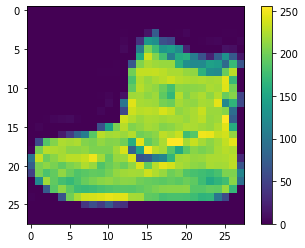

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

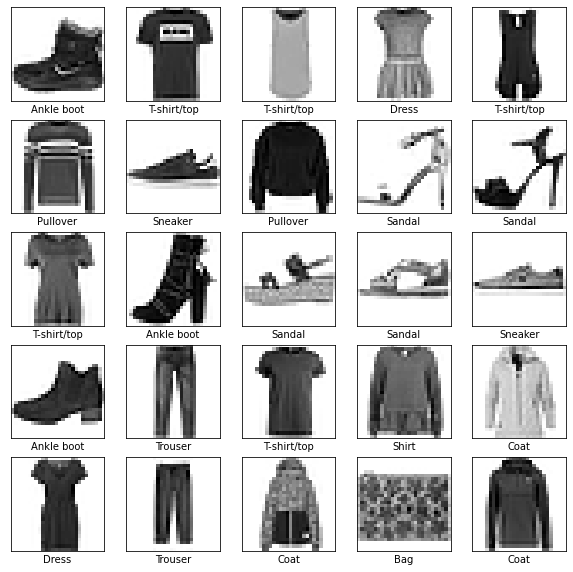

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construcción básicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones del set de datos que les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parámetros que son aprendidos durante el entrenamiento.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compilamos el modelo

Antes de que el modelo esté listo para entrenar, se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilación del modelo:

* *Loss function* — Mide qué tan exacto es el modelo durante el entrenamiento. Se requiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Representa cómo el modelo se actualiza basado en el set de datos que ve y la funcion de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fracción de las imágenes que son correctamente clasificadas.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregar los datos de entrenamiento al modelo. En esta práctica, el set de datos de entrenamiento están en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imágenes y etiquetas.
3. Le preguntamos al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluido en el arreglo `test_images`. Luego verificamos que las predicciones sean iguales a las etiquetas del arreglo `test_labels`.

Para comenzar a entrenar, Hacemos uso del método `model.fit`, es llamado así porque *fit* (ajusta) el modelo al set de datos de entrenamiento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3363 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2689 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2480 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

A medida que el modelo entrena, la pérdida y la exactitud son desplegadas. ¿Qué exactitud alncazó el modelo sobre el set de datos de entrenamiento?

## Evaluar Exactitud

A continuación, comparamos cómo es el rendimiento del modelo sobre el set de datos de prueba:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3492 - accuracy: 0.8784

Test accuracy: 0.8784000277519226


## Hacer predicciones

Con el modelo entrenado, ya podemos usarlo para hacer predicciones sobre imágenes.

In [17]:
predictions = model.predict(test_images)

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [18]:
predictions[0]

array([7.2787416e-09, 2.2216093e-10, 8.2118534e-09, 1.0837636e-09,
       7.2267552e-09, 2.0315185e-05, 7.3401722e-08, 2.0030807e-03,
       5.4563416e-09, 9.9797648e-01], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [19]:
np.argmax(predictions[0])

9

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [20]:
test_labels[0]

9

**Graficamos** esto para poder ver todo el set de la predicción de las 10 clases.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

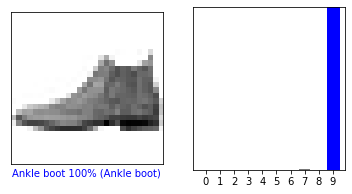

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

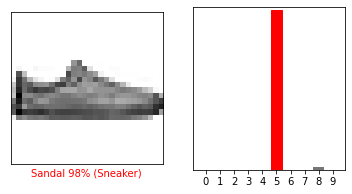

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

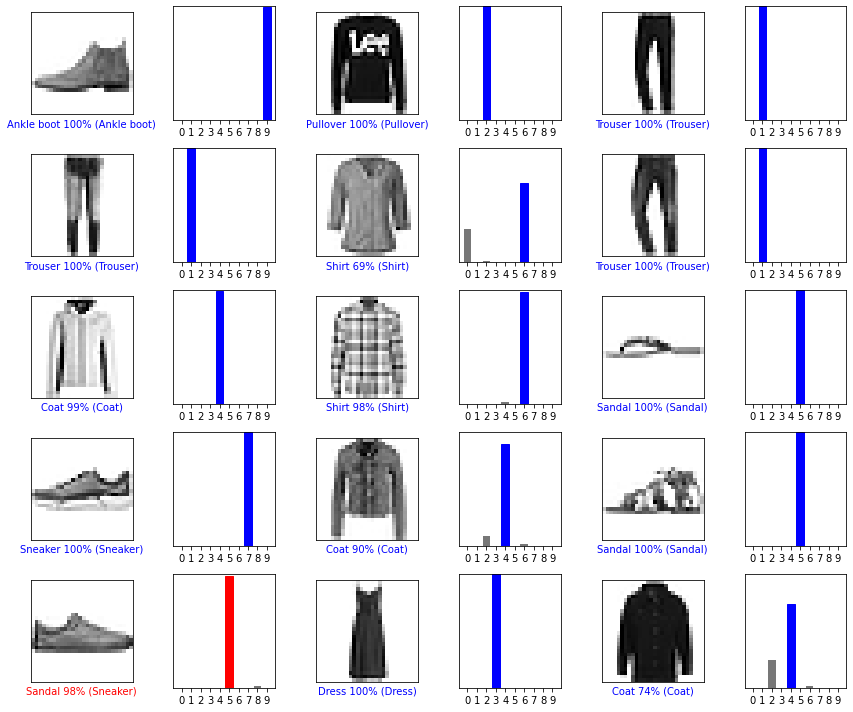

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una predicción sobre una única imagen.

In [27]:
img = test_images[1]
print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen hay que agregarla a una lista:

In [28]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Ahora generemos la predicción de la etiqueta correcta para esta imagen:

In [29]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.3111128e-05 5.5915510e-13 9.9963319e-01 2.7451802e-12 3.1895653e-04
  2.2908890e-09 2.4697461e-05 1.7236168e-16 5.0467394e-13 1.8752697e-16]]


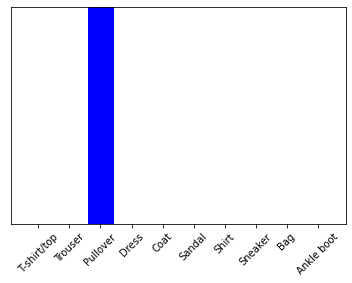

In [30]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tomemos la predicción para nuestra única imagen dentro del *batch* o bloque:

In [31]:
np.argmax(predictions_single[0])

2

In [32]:
print (test_labels[1])
print (class_names[2])

2
Pullover


El modelo predice una etiqueta de 2 (Pullover).

# Métricas para este modelo

Vamos calcular las métricas para verificar la calidad de este modelo de clasificación


In [40]:

y_pred=[]
for element in range(len(predictions)):
  a = np.argmax(predictions[element])
  y_pred.append(a)

print(y_pred)

y_true=test_labels.tolist()
print(y_true)
print(test_labels)

y_true2D = test_labels

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 2, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 4, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2, 2, 4, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 4, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 9, 1, 3, 6, 4, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 0, 

## Índice Davies-Bouldin


In [39]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(test_labels, y_pred)

ValueError: ignored

## Matriz de contigencia

In [35]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y_true, y_pred)

array([[902,   1,  15,  16,   5,   0,  57,   0,   4,   0],
       [  4, 973,   1,  15,   4,   0,   3,   0,   0,   0],
       [ 22,   0, 837,  11,  96,   0,  34,   0,   0,   0],
       [ 36,   4,  13, 866,  57,   0,  21,   0,   3,   0],
       [  1,   0, 118,  19, 830,   0,  31,   0,   1,   0],
       [  0,   0,   0,   1,   0, 952,   0,  15,   3,  29],
       [182,   2, 128,  28,  95,   0, 561,   0,   4,   0],
       [  0,   0,   0,   0,   0,  14,   0, 922,   0,  64],
       [  7,   0,   5,   6,   5,   2,   9,   4, 962,   0],
       [  0,   0,   0,   0,   0,   5,   1,  15,   0, 979]])

## Score de informacion mutua

In [36]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(y_true, y_pred) 

0.7996254066468007

## Indice de similitud de Fowlkes-Mallows

In [37]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(y_true, y_pred)

0.7899680822960565